# Question 1 (Occupations)

In [116]:
#Step 1. Import the necessary libraries

import pandas as pd

In [117]:
#Step 2. Import the dataset from this address.

import warnings
warnings.filterwarnings('ignore')
df1 = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',"|")

In [118]:
# Step 3. Assign it to a variable called users
# setting index of the data frame to "user_id"

df1.set_index(['user_id'])
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [119]:
# Step 4. Discover what is the mean age per occupation

users.groupby('occupation').mean(['age'])

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [120]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

maleRatio = pd.pivot_table(users, aggfunc = 'count', index = 'occupation', values = 'age', columns = 'gender', fill_value = 0)

In [121]:
#Step 5 (continue)
#Finding number of individuals from each type of occupations

total = maleRatio[['M','F']].sum(axis = 1)
maleRatio['maleRatio'] = (maleRatio['M'] / total)
maleRatio.sort_values(by = ['maleRatio'], ascending = False)

gender,F,M,maleRatio
occupation,,,
doctor,0,7,1.000000
engineer,2,65,0.970149
technician,1,26,0.962963
retired,1,13,0.928571
programmer,6,60,0.909091
executive,3,29,0.906250
scientist,3,28,0.903226
entertainment,2,16,0.888889
lawyer,2,10,0.833333


In [122]:
# Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').agg({'age':['min','max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [123]:
# Step 7. For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation','gender']).agg({'age':'mean'})

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [124]:
#Step 8. For each occupation present the percentage of women and men

maleRatio = pd.pivot_table(users, aggfunc = 'count', index = 'occupation', values = 'age', columns = 'gender', fill_value = 0)

# multiply by 100 to get the percentage of males
maleRatio['male %'] = (maleRatio['M'] / total) * 100

#Similarly for the females 
maleRatio['male %'] = (1 - (maleRatio['M'] / total)) * 100

#Rounding up percentage value
maleRatio.round(decimals = 1).drop(columns = ['M', 'F'], axis = 0)


gender,male %
occupation,
administrator,45.6
artist,46.4
doctor,0.0
educator,27.4
engineer,3.0
entertainment,11.1
executive,9.4
healthcare,68.8
homemaker,85.7


# Question 2 (Euro Teams) 

In [125]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12

import numpy as np
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [126]:
# Step 4. Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [127]:
# Step 5. How many team participated in the Euro2012?

euro12['Team'].count()

16

In [128]:
# Step 6. What is the number of columns in the dataset?

len(euro12.columns)

35

In [129]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [130]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards','Yellow Cards'], ascending = [True, True])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [131]:
# Step 9. Calculate the mean Yellow Cards given per Team

euro12.groupby('Team').agg({'Yellow Cards': 'mean'})

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [132]:
# Step 10. Filter teams that scored more than 6 goals

euro12.loc[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [133]:
#Step 11. Select the teams that start 
#with G

euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [134]:
#Step 12. Select the first 7 columns
#We can use slicing and dicing method for this step
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [135]:
#Step 13. Select all columns except the last 3
# again with help of slicing and dicing we can perform this step
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [136]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12[euro12.Team.isin(['England','Italy','Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3 (Housing)

In [137]:
#Step 1. Import the necessary libraries

import random

In [138]:
#Step 2. Create 3 differents Series, each of length 100, as follows:

# The first a random number from 1 to 4

series1 = pd.Series(np.random.randint(1,5, size = 100))
series1

0     2
1     3
2     4
3     2
4     2
     ..
95    3
96    3
97    2
98    4
99    1
Length: 100, dtype: int32

In [139]:
# The second a random number from 1 to 3

series2 = pd.Series(np.random.randint(1,4, size = 100))
series2

0     3
1     2
2     2
3     1
4     1
     ..
95    3
96    3
97    1
98    1
99    3
Length: 100, dtype: int32

In [140]:
# The third a random number from 10,000 to 30,000

series3 = pd.Series(np.random.randint(10000,30001, size = 100))
series3

0     15511
1     17291
2     23832
3     29593
4     13057
      ...  
95    25005
96    16053
97    26590
98    19136
99    17501
Length: 100, dtype: int32

In [141]:
#Step 3. Create a DataFrame by joinning the Series by column

new_data_frame = pd.DataFrame({'series1': series1, 'series2': series2, 'series3': series3})
new_data_frame

,series1,series2,series3
0,2,3,15511
1,3,2,17291
2,4,2,23832
3,2,1,29593
4,2,1,13057
...,...,...,...
95,3,3,25005
96,3,3,16053
97,2,1,26590
98,4,1,19136


In [142]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

new_data_frame.columns = ["bedrs", "bathrs", "price_sqr_meter"]
new_data_frame

,bedrs,bathrs,price_sqr_meter
0,2,3,15511
1,3,2,17291
2,4,2,23832
3,2,1,29593
4,2,1,13057
...,...,...,...
95,3,3,25005
96,3,3,16053
97,2,1,26590
98,4,1,19136


In [143]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it  to 'bigcolumn'

bigcolumn = pd.concat([series1, series2, series3])
bigcolumn

0         2
1         3
2         4
3         2
4         2
      ...  
95    25005
96    16053
97    26590
98    19136
99    17501
Length: 300, dtype: int32

In [144]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

print("The length is:", len(bigcolumn))

if (max(bigcolumn.index)==99):
    print("True, the index is 99")
else:
    print("False, the index is not 99")

The length is: 300
True, the index is 99


In [145]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop = True)

0          2
1          3
2          4
3          2
4          2
       ...  
295    25005
296    16053
297    26590
298    19136
299    17501
Length: 300, dtype: int32

In [ ]:
#Question 4
#Wind Statistics 
#The data have been modified to contain some missing values, identified by NaN.
#Using pandas should make this exercise easier, in particular for the bonus question.
#You should be able to perform all of these operations without using a for loop or 
#other looping construct.

In [146]:
#step 1 import libraries

import datetime

In [147]:
# Step 2. Import dataset from this address

wind_stat_data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', delim_whitespace = True)
wind_stat_data = wind_stat_data.rename(columns = {'Yr': 'Year', 'Mo': 'Month', 'Dy': 'Day'})

wind_stat_data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [148]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

wind_stat_data["Date"] = pd.to_datetime(wind_stat_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis = 1))
wind_stat_data = wind_stat_data.drop(columns = ['Year', 'Month', 'Day'])
column_names = ["Date", "RPT", "VAL", "ROS", "KIL","SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]
wind_stat_data = wind_stat_data.reindex(columns = column_names)
wind_stat_data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [149]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def correct_date(col_name):

    if col_name.year > 2000:
        year = col_name.year - 100
    else:
        year = col_name.year
    return datetime.date(year, col_name.month, col_name.day)

In [151]:
# step 4 continue

wind_stat_data['Date'] = wind_stat_data['Date'].apply(correct_date)
wind_stat_data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [152]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

wind_stat_data_new = wind_stat_data.set_index("Date")
wind_stat_data_new.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [153]:
# Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in
# all calculations below.

wind_stat_data_new.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [154]:
# Step 7. Compute how many non-missing values there are in total.

wind_stat_data_new.count()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [155]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.


wind_stat_data_new.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [156]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations
# of the windspeeds at each location over all the days

loc_stats = pd.DataFrame()
loc_stats['min'] = wind_stat_data_new.min(axis = 0)
loc_stats['max'] = wind_stat_data_new.max(axis = 0)
loc_stats['mean'] = wind_stat_data_new.mean(axis = 0)
loc_stats['std'] = wind_stat_data_new.std(axis = 0)
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [157]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations
# of the windspeeds across all the locations at each day.

day_stats = pd.DataFrame()
day_stats['min'] = wind_stat_data_new.min(axis = 1)
day_stats['max'] = wind_stat_data_new.max(axis = 1)
day_stats['mean'] = wind_stat_data_new.mean(axis = 1)
day_stats['std'] = wind_stat_data_new.std(axis = 1)
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [158]:
# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January.

wind_stat_data['month'] = pd.DatetimeIndex(wind_stat_data['Date']).month
january_avg = wind_stat_data.where(wind_stat_data['month'] == 1)
january_avg.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [159]:
# Step 12. Downsample the record to a yearly frequency for each location.


wind_stat_data_new.asfreq('A')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


In [160]:
# Step 13. Downsample the record to a monthly frequency for each location.


wind_stat_data_new.asfreq('B')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-25,7.21,6.58,7.83,2.67,4.79,4.58,8.71,0.75,5.21,5.25,1.21,13.96
1978-12-26,13.83,11.87,10.34,2.37,6.96,4.29,1.96,3.79,3.04,3.08,4.79,11.96
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08


In [161]:
# Step 14. Downsample the record to a weekly frequency for each location.

wind_stat_data_new.asfreq('C')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-25,7.21,6.58,7.83,2.67,4.79,4.58,8.71,0.75,5.21,5.25,1.21,13.96
1978-12-26,13.83,11.87,10.34,2.37,6.96,4.29,1.96,3.79,3.04,3.08,4.79,11.96
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08


In [162]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of thewindspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

df = wind_stat_data_new[wind_stat_data_new.index < pd.to_datetime('1962-01-01')]
df.asfreq('D').mean()
df.asfreq('D').min()
df.asfreq('D').max()
df.asfreq('D').std()

day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


# Question 5

In [163]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter = '\t')

In [164]:
# Step 4. See the first 10 entries


chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [165]:
# Step 5. What is the number of observations in the dataset?


len(chipo)

4622

In [166]:
# Step 6. What is the number of columns in the dataset?


len(chipo.columns)

5

In [167]:
# Step 7. Print the name of all the columns.


chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [168]:
# Step 8. How is the dataset indexed?


chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [169]:
# Step 9. Which was the most-ordered item?

most_ordered_item = chipo['item_name'].value_counts()
most_ordered_item

#Chicken bowl is the most ordered item with quantity'726'

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [170]:
#Step 10. For the most-ordered item, how many items were ordered?

most_ordered_item[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [171]:
# Step 11. What was the most ordered item in the choice_description column?

chipo.choice_description.value_counts()

#it can be clearly seen Diet Coke is the most ordered item

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [197]:
# Step 12. How many items were orderd in total?


chipo['quantity'].sum()

4972

In [173]:
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].dtypes

dtype('float64')

In [174]:
# Step 14. How much was the revenue for the period in the dataset?

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo['revenue'].sum()

39237.02

In [175]:
# Step 15. How many orders were made in the period?

orders = chipo['order_id'].nunique()
orders

1834

In [176]:
# Step 16. What is the average revenue amount per order?

chipo.groupby('order_id')['revenue'].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [177]:
# Step 17. How many different items are sold?

chipo['item_name'].nunique()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [178]:
marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages_divorces.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


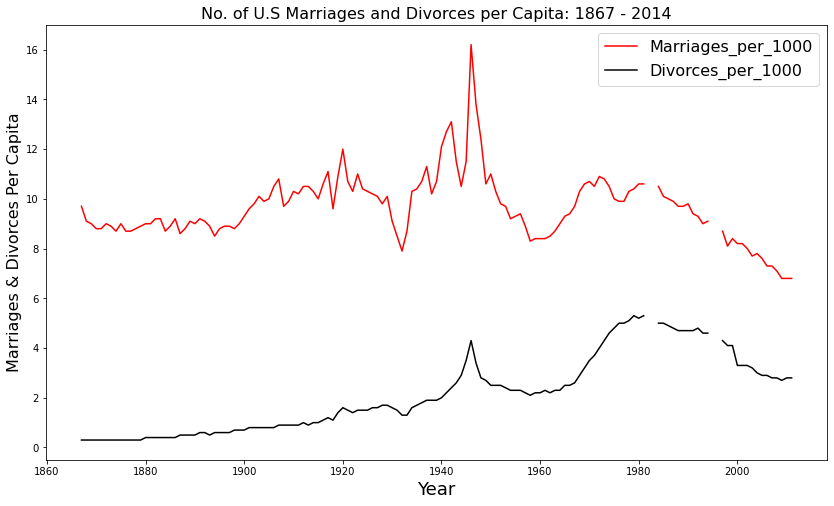

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

marriages_divorces.plot.line(x = 'Year', y = ['Marriages_per_1000', 'Divorces_per_1000'], figsize = (14,8), color ={"red", "black"})

# label the plot and axis

# for x axis
plt.xlabel('Year', fontsize = 18)

#for y axis
plt.ylabel('Marriages & Divorces Per Capita', fontsize = 16)

# add title
plt.title('No. of U.S Marriages and Divorces per Capita: 1867 - 2014', fontsize = 16)

# show legend
plt.legend(prop = dict(size = 16))

plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

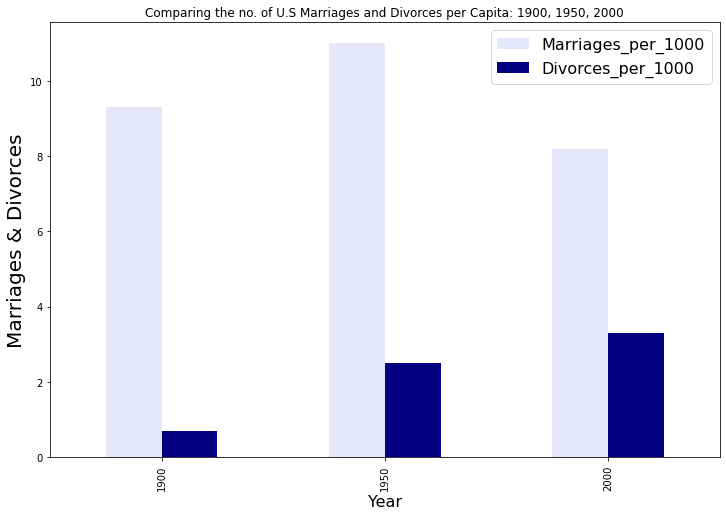

In [180]:
# adding only data we need to compare
marriages_divorces = marriages_divorces[(marriages_divorces.Year == 1900) | (marriages_divorces.Year == 1950) | (marriages_divorces.Year == 2000)]
marriages_divorces = marriages_divorces.drop(columns = ['Marriages', 'Divorces', 'Population'])
marriages_divorces = marriages_divorces.set_index('Year')

marriages_divorces

marriages_divorces.plot.bar(figsize = (12,8), color = {"navy", "lavender"})

# label the chart and axis

# for x axis
plt.xlabel('Year', fontsize = 16)

# for y axis
plt.ylabel('Marriages & Divorces', fontsize = 20)

# adding title to plot
plt.title('Comparing the no. of U.S Marriages and Divorces per Capita: 1900, 1950, 2000')

# show legend
plt.legend(prop = dict(size = 16))

plt.show()

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

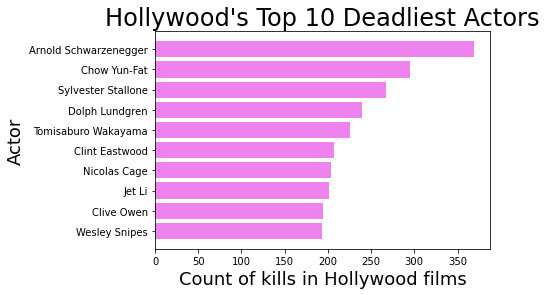

In [181]:
#import data into dataframe
hollywood_data = pd.read_csv('actor_kill_counts.csv')
hollywood_data = hollywood_data.sort_values(by=['Count'])

# add title
plt.title("Hollywood's Top 10 Deadliest Actors", fontsize = 24)

# label the chart and axis

# for x axis
plt.ylabel('Actor', fontsize = 18)

# for y axis
plt.xlabel('Count of kills in Hollywood films', fontsize = 18)

plt.barh(hollywood_data['Actor'], hollywood_data.Count, color = {"violet"})

plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

In [184]:
#import data to dataframe
romanemp_data = pd.read_csv('roman-emperor-reigns.csv')
romanemp_data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [196]:
#grouping data by death cause and total of type of death
#sorting them in decreasing order
romanemp_data_death = romanemp_data.groupby('Cause_of_Death').count().drop(columns = 'Length_of_Reign')
romanemp_data_death.sort_values(by = ['Emperor'], ascending = False)

,Emperor
Cause_of_Death,
Assassinated,22
Natural causes,16
Killed in battle,8
Possibly assassinated,8
Illness,5
Suicide,5
Executed,3
Died in captivity,1


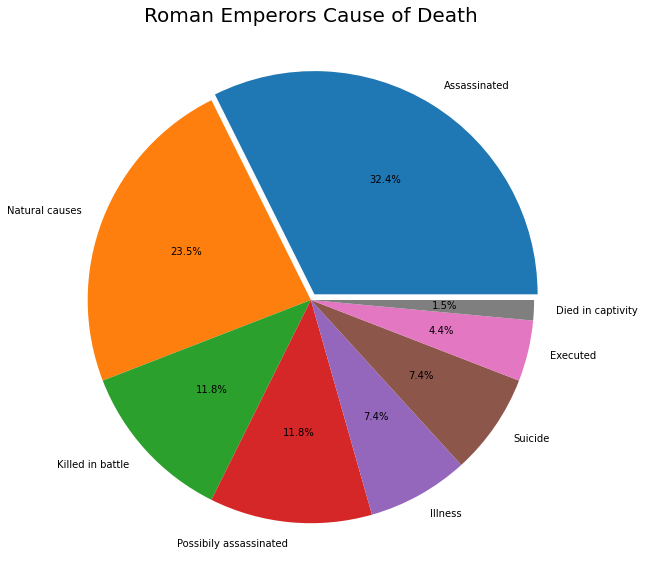

In [189]:
y = np.array([22, 16, 8, 8, 5, 5, 3, 1])
label = ["Assassinated", 'Natural causes', 'Killed in battle', 'Possibily assassinated',
'Illness', 'Suicide','Executed', 'Died in captivity']

# explode "Assassinated"
explode = (0.03, 0, 0, 0, 0, 0, 0, 0)

# create plot
fig1, ax1 = plt.subplots(figsize = (10,10))

# name the labels, axis, and title
ax1.axis('equal')
ax1.pie(y, labels = label, autopct = '%1.1f%%', explode = explode)
ax1.set_title('Roman Emperors Cause of Death', fontsize = 20)

plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.

In [190]:
#import csv file & add to DataFrame
arcade_cs_phd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_cs_phd

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [191]:
#import libraries
import seaborn as sns

Text(0, 0.5, 'Total Arcade Revenue ($ billions)')

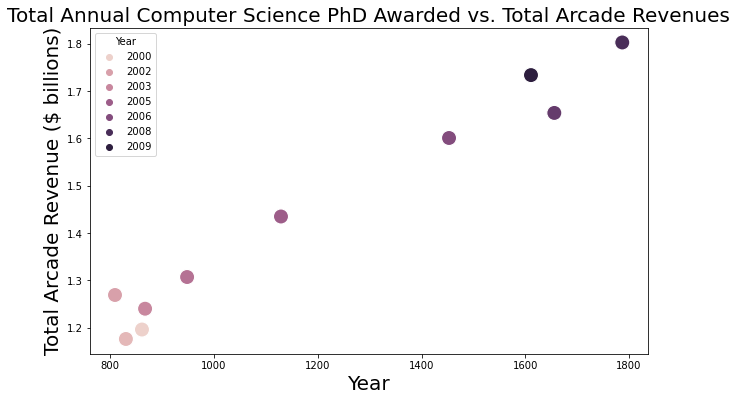

In [194]:
plt.figure(figsize = (10,6))

# create scatter plot, name title, and increase the size of the data points
sns.scatterplot(x = 'Computer Science Doctorates Awarded (US)', 
                y = 'Total Arcade Revenue (billions)', 
                data = arcade_cs_phd, hue = 'Year', s = 230,).set_title('Total Annual Computer Science PhD Awarded vs. Total Arcade Revenues', fontsize = 20)

# label the axis
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total Arcade Revenue ($ billions)', fontsize = 20)